# Input & Output

This section contains the introduction of reading and writing files.

## File Format 

Firstly, two typical types of Stereo-seq data, GEM and GEF, are shown below:

#### GEM

GEM file contains columns of geneID, x, y, MIDCount, ExonCount where x, y represent spatial positions of genes in the tissue section. MIDCount is the number of gene expression and ExonCount is the number of exon expression only in GEM file, which is generated by `spatial_RNA_visualization_v5` in SAP or SAW (version >= 5.1.3).

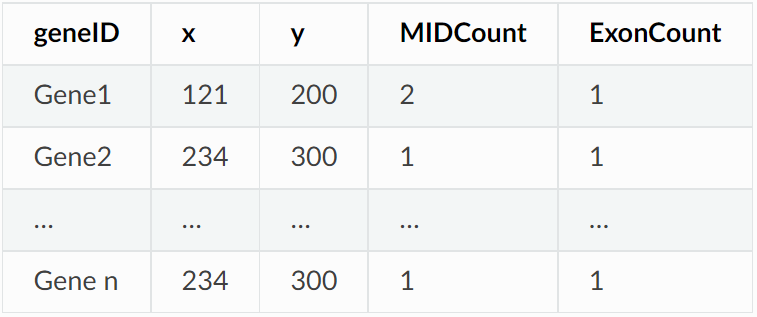

#### GEF (Square Bin)

Square bin type of GEF file, with the suffix of `.raw.gef`/`.gef`/`.tissue.gef` ([**Square bin GEF details**](https://www.processon.com/view/link/610cc49c7d9c087bbd1ab7ab#map)).

#### GEF (Cell Bin)

 Cell bin type of GEF file, with the suffix of `.cellbin.gef` ([**Cell bin GEF details**](https://www.processon.com/view/link/6274de9c0791290711fa418d#map)).

More details about GEF files to see in format documents. Usually, we recommend using GEF whose speed of being read is much faster than GEM.

Other input files that Stereopy could support:

#### Stereo H5ad

One type of h5ad file containing StereoExpData object which is generated by Stereopy.

#### Anndata H5ad

One type of h5ad file containing Anndata object which is generated by Scanpy.

#### Seurat H5ad

One type of h5ad file containing Anndata object which is generated by Seurat.

## Reading

#### GEM File

In [ ]:
import stereo as st
import warnings
warnings.filterwarnings('ignore')

# read the gem file
data_path = './SS200000135TL_D1.cellbin.gem'
data = st.io.read_gem(
        file_path=data_path,
        sep='\t', 
        bin_type='bins',
        bin_size=100, 
        is_sparse=True,
        )

More parameter details about `stereo.io.read_gem`. 

#### Attributes of GEF File

In [ ]:
import stereo as st
import warnings
warnings.filterwarnings('ignore')

# get attributes from GEF file
data_path = './SS200000135TL_D1.tissue.gef'
gef_info = st.io.read_gef_info(file_path=data_path)

#### GEF File (Square Bin)

In [ ]:
import stereo as st
import warnings
warnings.filterwarnings('ignore')

# read the GEF file of square bin
data_path = './SS200000135TL_D1.tissue.gef'
data = st.io.read_gef(
        file_path=data_path,
        bin_size=100, 
        is_sparse=True,
        )

More parameter details about `stereo.io.read_gef`.

#### GEF File (Cell Bin) 

In [4]:
import stereo as st
import warnings
warnings.filterwarnings('ignore')

# read the GEF file of cell bin
data_path = './SS200000135TL_D1.cellbin.gef'
data = st.io.read_gef(
        file_path=data_path,
        is_sparse=True,
        bin_type='cell_bins',
        )

More parameter details about `stereo.io.read_gef`.

#### Stereo H5ad File

In [5]:
import stereo as st
import warnings
warnings.filterwarnings('ignore')

# read the Stereo h5ad file
data_path = './SS200000141TL_B5_raw.h5ad'
data = st.io.read_stereo_h5ad(
        file_path=data_path,
        use_raw=True,
        use_result=True,
        )

More parameter details about `stereo.io.read_stereo_h5ad`.

#### Anndata H5ad File

In [ ]:
import stereo as st
import warnings
warnings.filterwarnings('ignore')

# read the Anndata h5ad file
ann_h5ad = './DP8400013846TR_F5.anndata.h5ad'
data = st.io.read_ann_h5ad(
        file_path=ann_h5ad,
        spatial_key=None,
        )

More parameter details about `stereo.io.read_ann_h5ad`.

#### Seurat H5ad File

In [ ]:
import stereo as st
import warnings
warnings.filterwarnings('ignore')

# read the Seurat h5ad file
seurat_h5ad = './SS200000003BR_B3.annotation.h5ad'
data = st.io.read_seurat_h5ad(
        file_path=seurat_h5ad, 
        use_raw=True,
        )

More parameter details about `stereo.io.read_seurat_h5ad`.

## Writing

After a series of processing, you could save the data into output files for subsequent analysis.

### GEF File

#### New GEF File 

You may use a method of lasso tool/gene list/region list to filter data and these steps can generate filtered StereoExpData object.Then processed data could be saved into a new GEF file.

In [ ]:
import stereo as st
import warnings
warnings.filterwarnings('ignore')

# read the GEF file
data_path = './SS200000135TL_D1.tissue.gef'
data = st.io.read_gef(file_path=data_path, bin_size=50)

# use a gene list for filtering
data.tl.filter_genes(gene_list=['H2al2a','Gm6135'], inplace=True)

# save the data, only the result after filtering
st.io.write_mid_gef(
        data=data, 
        output='./DP8400013846TR_F5.filtered.gef'
        )

More parameter details about `stereo.io.write_mid_h5ad`, and an example of using `lasso`.

#### Existing GEF File

After preprocessing and clustering, you could add clustering information(from Leiden/Louvain... method) to input GEF file.

In [ ]:
import stereo as st
import warnings
warnings.filterwarnings('ignore')

# read the GEF file
data_path = './SS200000135TL_D1.tissue.gef'
data = st.io.read_gef(file_path=data_path, bin_size=50)

# preprocessing
data.tl.cal_qc()
data.tl.raw_checkpoint()
data.tl.sctransform(res_key='sctransform', inplace=True)

# clustering
data.tl.pca(use_highly_genes=False, n_pcs=30, res_key='pca')
data.tl.neighbors(pca_res_key='pca', n_pcs=30, res_key='neighbors')
data.tl.umap(pca_res_key='pca', neighbors_res_key='neighbors', res_key='umap')
data.tl.leiden(neighbors_res_key='neighbors', res_key='leiden')

# add the imformation of clustering groups stored in cluster_res_key to input GEF file.
st.io.update_gef(
        data=data, 
        gef_file=data_path, 
        cluster_res_key='leiden',
        )

More parameter details about `stereo.io.update_gef`.

#### Stereo H5ad File 

In [ ]:
import stereo as st
import warnings
warnings.filterwarnings('ignore')

# read the GEF file
data_path = './SS200000135TL_D1.tissue.gef'
data = st.io.read_gef(file_path=data_path, bin_size=50)

# preprocessing
data.tl.cal_qc()
data.tl.raw_checkpoint()
data.tl.sctransform(res_key='sctransform', inplace=True)

# clustering
data.tl.pca(use_highly_genes=False, n_pcs=30, res_key='pca')
data.tl.neighbors(pca_res_key='pca', n_pcs=30, res_key='neighbors')
data.tl.umap(pca_res_key='pca', neighbors_res_key='neighbors', res_key='umap')
data.tl.leiden(neighbors_res_key='neighbors', res_key='leiden')
data.tl.louvain(neighbors_res_key='neighbors', res_key='louvain')

# data.tl.key_record is a dictionary created automatically while you running commands
# keys in data.tl.key_record are set by Stereopy, values are set according to the res_key parameter in above commands
print(data.tl.key_record)

# write a new h5ad with StereoExpData, if key_record = None, it will use the res_key stored in data.tl.key_record)
st.io.write_h5ad(
        data, 
        use_raw=True, 
        use_result=True, 
        key_record=None,
        )

# you could create a dictionary to get targeted result, format as:
outkey_record = {'cluster':['leiden','louvain'],}

st.io.write_h5ad(
        data, 
        use_raw=True, 
        use_result=True, 
        key_record=outkey_record, 
        output='./DP8400013846TR_F5.h5ad',
        )

More parameter details about `stereo.io.write_h5ad`

#### Anndata H5ad file

In [ ]:
import stereo as st
import warnings
warnings.filterwarnings('ignore')

# read the GEF file
data_path = './SS200000135TL_D1.tissue.gef'
data = st.io.read_gef(file_path=data_path, bin_size=50)
data.tl.raw_checkpoint()

# conversion
adata = st.io.stereo_to_anndata(data,flavor='seurat',output='out.h5ad')

[Work with scanpy/seurat](https://stereopy.readthedocs.io/en/latest/Tutorials/FormatConversion.html).